In [14]:
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import iris.coord_categorisation
import numpy

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [19]:
hfbasin_file = '/g/data/r87/dbi599/DRSv2/CMIP5/NorESM1-M/historical/yr/ocean/r1i1p1/hfbasin/latest/hfbasin-global_Oyr_NorESM1-M_historical_r1i1p1_all.nc'    
hfds_file = '/g/data/r87/dbi599/DRSv2/CMIP5/NorESM1-M/historical/yr/ocean/r1i1p1/hfds/latest/hfds-zonal-sum_Oyr_NorESM1-M_historical_r1i1p1_all.nc'

In [20]:
hfbasin_cube = iris.load_cube(hfbasin_file, 'northward_ocean_heat_transport')
hfbasin_cube

<iris 'Cube' of northward_ocean_heat_transport / (W) (time: 156; latitude: 166)>

In [21]:
hfds_cube = iris.load_cube(hfds_file, 'surface_downward_heat_flux_in_sea_water')
hfds_cube

<iris 'Cube' of surface_downward_heat_flux_in_sea_water / (W) (time: 156; latitude: 166)>

In [22]:
hfbasin_clim = hfbasin_cube.collapsed('time', iris.analysis.MEAN)
hfbasin_clim

<iris 'Cube' of northward_ocean_heat_transport / (W) (latitude: 166)>

In [23]:
hfds_clim = hfds_cube.collapsed('time', iris.analysis.MEAN)
hfds_clim

<iris 'Cube' of surface_downward_heat_flux_in_sea_water / (W) (latitude: 166)>

In [25]:
hfbasin_inferred = hfbasin_clim.copy()
hfbasin_inferred.data = numpy.ma.cumsum(hfds_clim.data)
hfbasin_inferred

<iris 'Cube' of northward_ocean_heat_transport / (W) (latitude: 166)>

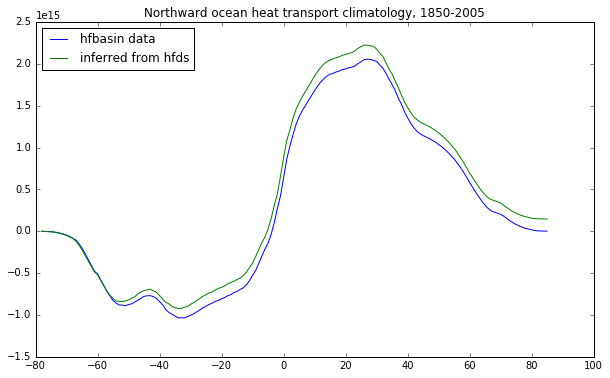

In [37]:
plt.figure(figsize=[10, 6])
iplt.plot(hfbasin_clim, label='hfbasin data')
iplt.plot(hfbasin_inferred, label='inferred from hfds')
plt.title('Northward ocean heat transport climatology, 1850-2005')
plt.legend(loc=2)
plt.show()